The Below Content is attributed to UofT's LearnAI course led by the UofT AI student organization.

In [12]:
import torch
import matplotlib.pyplot as plt

# Tensors

Tensors are the fundamental data structure in PyTorch. In Python, lists are used to represent series of elements. PyTorch uses tensors in the same way, but with a few added features:
- N-Dimensional tensors (vectors, matrices, ...)
- Built in linear algebra operations
- Gradient computation with Autograd

In [13]:
# Initializing a tensor
t1 = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32) # dtype can be set to one of many types provided by torch
print(t1)

tensor([1., 2., 3., 4., 5.])


The shape of a tensor refers to it's dimensions. A 1-dimensional tensor is a vector, 2-dimensional is a matrix, ...

In [14]:
print(t1.shape)
t2 = torch.tensor([
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5]
])
print(t2.shape)

torch.Size([5])
torch.Size([3, 5])


We can initialize arbitrarily shaped tensors with torch

In [15]:
z = torch.zeros(3, 5) # a tensor of all zeros of the shape 3x5
o = torch.ones(5, 3) # a tensor of all ones with shape 5x3
print(z)
print(o)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


We can also initialize tensors with random values

In [16]:
r1 = torch.rand(3, 5, 2) # random values sampled from the uniform distribution on interval [0,1) in the shape 3x5x10
print(r1)

r2 = torch.randn(2, 2) # random values sampled from normal distribution with mean 0 and variance 1 of shape 2x2
print(r2)

tensor([[[0.0793, 0.6772],
         [0.6271, 0.4388],
         [0.1567, 0.4468],
         [0.3220, 0.4033],
         [0.5465, 0.8864]],

        [[0.9270, 0.8798],
         [0.5554, 0.0140],
         [0.1887, 0.9795],
         [0.7321, 0.4250],
         [0.9724, 0.9883]],

        [[0.7979, 0.0417],
         [0.8051, 0.2818],
         [0.1685, 0.1569],
         [0.7962, 0.1562],
         [0.0365, 0.5548]]])
tensor([[-0.2110,  0.9105],
        [-0.7324,  0.6771]])


# Basic Operations

Torch allows the use of regular python arithmetic syntax to manipulate tensors

In [17]:
a = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)
print(a + 1) # Elementwise addition
print(a - 1) # Elementwise subtraction
print(a * 2) # Elementwise multiplication
print(a / 2) # Elementwise division
print(a ** 2) # Elementwise exponentiation

tensor([2., 3., 4., 5., 6.])
tensor([0., 1., 2., 3., 4.])
tensor([ 2.,  4.,  6.,  8., 10.])
tensor([0.5000, 1.0000, 1.5000, 2.0000, 2.5000])
tensor([ 1.,  4.,  9., 16., 25.])


In [18]:
b = torch.zeros_like(a) # creates an array of all zeros in the shape of a
print(a + b)
print(a * b)

tensor([1., 2., 3., 4., 5.])
tensor([0., 0., 0., 0., 0.])


## Exercise
Create a tensor of size `n` where each element has value `x`

In [21]:
n = 10000
x = 7
# Your code here
z = x*torch.ones(n)
print(z)

tensor([7., 7., 7.,  ..., 7., 7., 7.])


# Linear Algebra operations

We can also perform linear algebra operations on tensors, such as;
- Dot product
- Matrix multiplication
- Matrix transpose
- Batched matrix multiplications

In [23]:
v1 = torch.arange(1, 2, 0.2) # range of values from 1 to 2 with step 0.2
v2 = torch.randn_like(v1) # randn tensor of same shape as v1
print(v1)
print(v2)
# different ways to do dot products
out1 = v1 @ v2
out2 = v1.dot(v2)
out3 = torch.dot(v1, v2)

print(out1)
print(out2)
print(out3)

tensor([1.0000, 1.2000, 1.4000, 1.6000, 1.8000])
tensor([-0.8813,  1.4914,  0.5553,  0.2555,  0.7901])
tensor(3.5168)
tensor(3.5168)
tensor(3.5168)


In [ ]:
a = torch.rand(3, 5)
b = torch.rand(5, 3)

# Ways to do matrix multiplication
out1 = a @ b
out2 = a.matmul(b)
out3 = torch.matmul(a, b)
out4 = a.mm(b)

print(out1)
print(out2)
print(out3)
print(out4)

In [24]:
mat = torch.ones(3, 5)
print(mat)
print(mat.T) # transpose of a matrix, swaps columns and rows, "rotates"

mat2 = torch.ones(3, 5, 2)
print(mat2.shape)
print(mat2.transpose(1, 2).shape) # swaps 5 and 2, leaves 3 alone. (axis are labelled 0, 1, 2...) 

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([3, 5, 2])
torch.Size([3, 2, 5])


In [25]:
# Batching matrix multiplications, we do so to allow us to do repeated gradients for batches (chunks) of our dataset
a = torch.randn(6, 32, 64) # a batch of 6 matrices, each of shape 32 x 64
b = torch.randn(6, 64, 128) # a batch of 6 matrices, each of shape 64 x 128
out = torch.bmm(a, b) # batched matrix multiplications
print(out.shape)

torch.Size([6, 32, 128])


## Exercise
Perform matrix multiplication of `matA` with `matB` and add `matC` (elementwise)

In [33]:
matA = torch.randn(256, 512)
matB = torch.randn(512, 128)
matC = torch.randn(256, 128)

# Your code here

print((matA@matB) + matC)

tensor([[-30.7250,  39.7910, -15.7131,  ..., -52.2086, -24.0224,   7.7324],
        [ 57.9451, -22.6428,  19.2078,  ...,  17.3889,  15.3500, -14.3529],
        [  9.4666,   8.4184,  11.7989,  ...,  -4.8839,  58.9255,   9.6975],
        ...,
        [-30.7154, -30.7957,  -5.2263,  ..., -31.0814, -13.6440,  42.9698],
        [-13.8758, -18.4903,  16.7131,  ...,  -7.9514,   0.4583, -20.4353],
        [ -8.9600, -18.5718,   1.4928,  ...,  26.5875,  -6.8514, -32.1505]])


# Reshaping tensors

Often, we want to change the shape of a tensor so that we can perform operations on it. PyTorch allows us to do this.

In [34]:
a = torch.arange(1, 10, 1)
print(a)

# using view to reshape
a_reshaped = a.view(3, 3)
print(a_reshaped)

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [35]:
b = torch.ones(64, 3, 28, 28) # Tensor of shape 64 x 3 x 28 x 28
print(b.shape)

# Flattening the last two dimensions of b
b_reshaped = b.view(b.shape[0], b.shape[1], -1) # -1 means "collapse any remaining dimensions"
print(b_reshaped.shape)

torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 784])


In [36]:
# Rearranging the dimensions of b
b_permuted = b.permute(2, 3, 0, 1) # the inputs dictate placement of the dimensions. For example, this puts the the dimension at index 0 (64) into index 2
print(b_permuted.shape)

torch.Size([28, 28, 64, 3])


## Exercise
Multiply the following batch of matrices with a transpose of itself

In [41]:
m = torch.randn(10, 28, 116) # batch of 10 28x116 matrices
# Your code here
m_transposed = m.transpose(2, 1) # we do transpose because of batches
(m.bmm(m_transposed)).shape


torch.Size([10, 28, 28])

# Vectorizing operations

Writing for/while loops to operate over data in tensors is not desireable, since python code is slow to run. It is much more efficient to **vectorize** operations, which involves using PyTorch to perform our computations. This is because PyTorch is written in compiled languages, which are much quicker to run.

In [44]:
a = torch.ones(1000000)

In [45]:
%%time
for i in range(len(a)):
    a[i] += 1
print(a)

tensor([2., 2., 2.,  ..., 2., 2., 2.])
CPU times: total: 6.22 s
Wall time: 12.5 s


In [46]:
%%time
out2 = a + 1
print(out2)

tensor([3., 3., 3.,  ..., 3., 3., 3.])
CPU times: total: 0 ns
Wall time: 2.4 ms


As you can see, the vectorized version is many orders of magnitude quicker

## Exercise
Vectorize the calculation of the mse loss value from tensors `yhat` and `y` below <br>
Hint: `torch.sum(x)` computes the sum of the elements in tensor `x`

In [51]:
yhat = torch.randn(256)
y = torch.randn(256)
# Your code here
torch.sum((yhat-y)**2) / 256
((yhat-y)**2).mean()





tensor(2.0813)

# Final Exercise: Vectorizing our linear regression code

In [53]:
def generate_regression_dataset(start_xval, end_xval, num_points, noise_factor):
    slope, intercept = torch.randn(2)
    xvals = torch.arange(start=start_xval, end=end_xval, step=(end_xval - start_xval)/num_points)
    yvals = xvals * slope + intercept + (torch.randn_like(xvals) * noise_factor)
    return xvals, yvals


def plot_regression_dataset(xvals, yvals, weight=None, bias=None, size=None) -> None:
    if size is None:
        size = [20 for _ in xvals]
    else:
        size = [size for _ in xvals]

    plt.figure(figsize=(20, 10))
    plt.scatter(xvals, yvals, s=size)

    if weight is not None and bias is not None:
        min_yval = weight * xvals[0] + bias
        max_yval = weight * xvals[-1] + bias
        plt.plot([xvals[0], xvals[-1]], [min_yval, max_yval], c="red")

    plt.show()

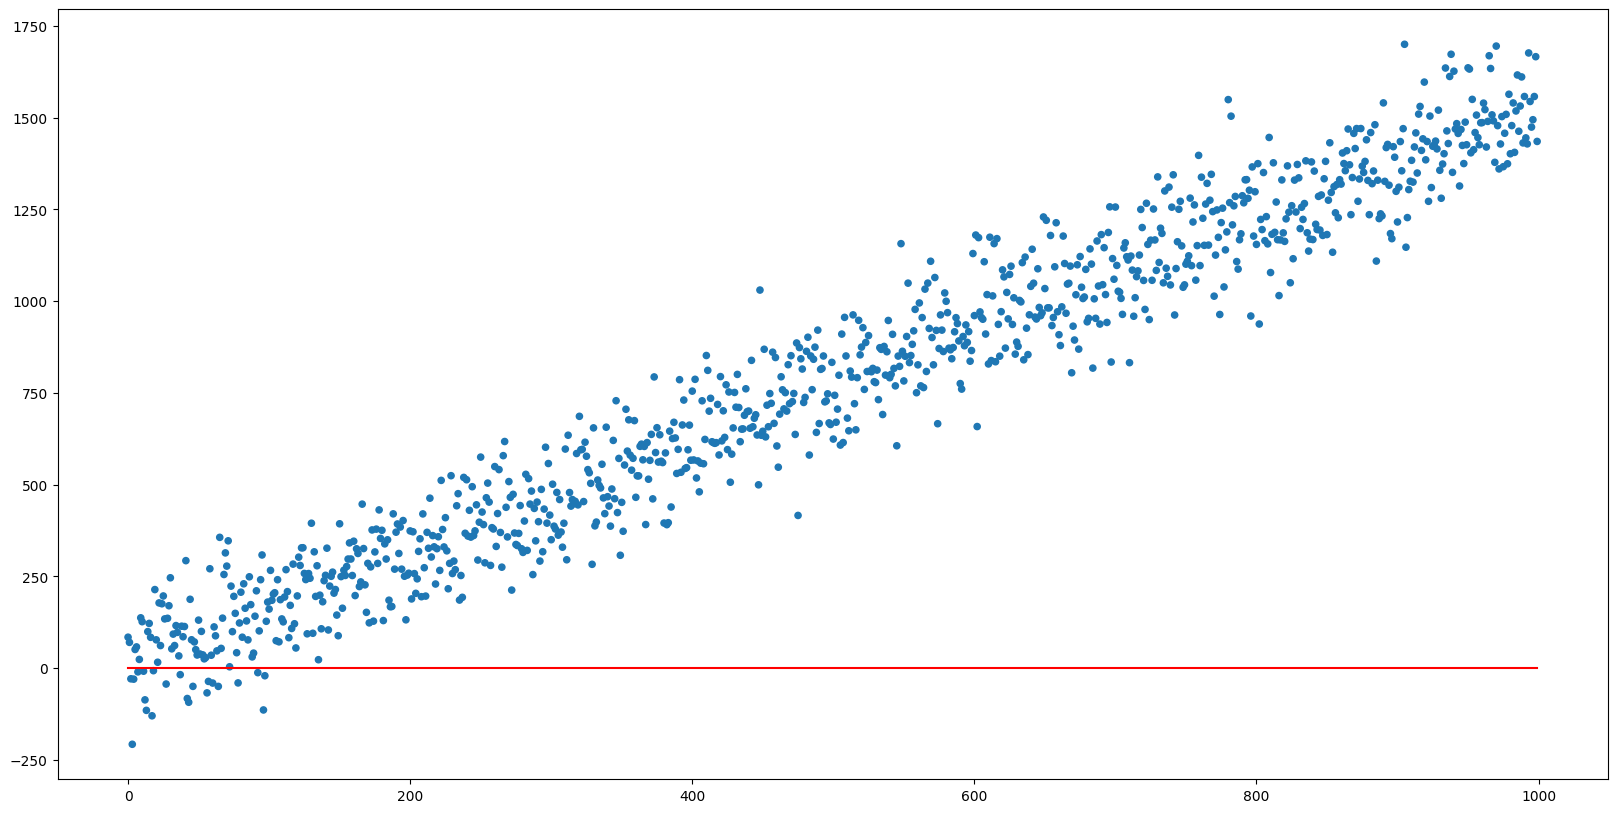

In [57]:
torch.manual_seed(0)
x, y = generate_regression_dataset(0, 1000, 1000, 100)
w, b = 0, 0
plot_regression_dataset(x, y, w, b)

In [55]:
def f(x, w, b):
    return x * w + b

def calc_mse_loss(yhat, y):
    return torch.pow(yhat - y, 2).mean()

def calc_w_grad(yhat,y,x):
    return 2 * ((yhat - y) * x).mean()

def calc_b_grad(yhat,y):
    return 2 * (yhat - y).mean()

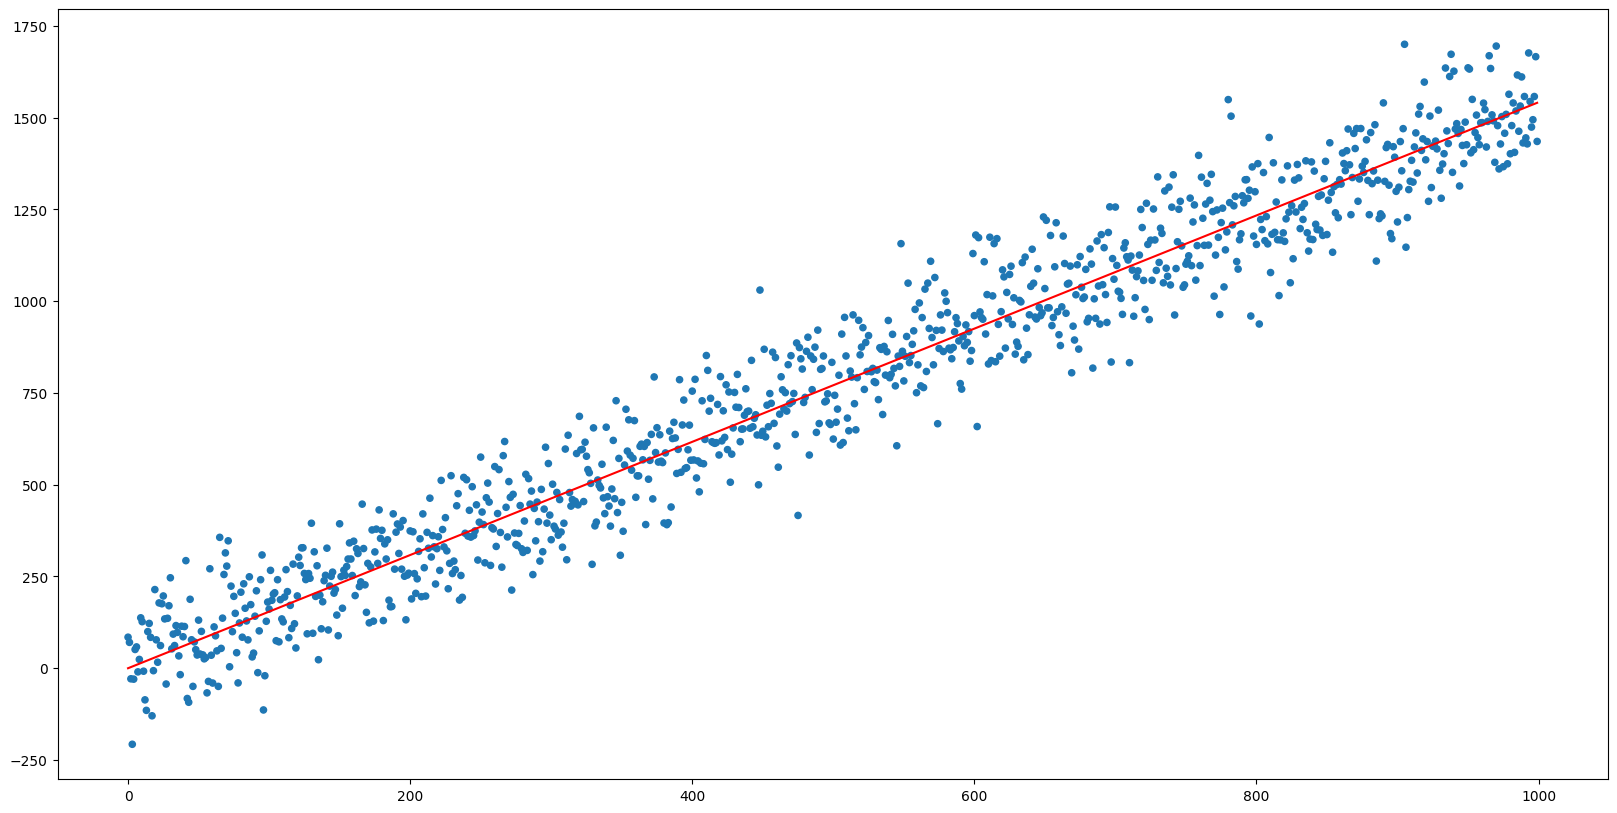

In [70]:
lr = 0.00000001
for i in range(100):
    yhat = f(x, w, b)
    wgrad = calc_w_grad(yhat,y,x)
    bgrad = calc_b_grad(yhat,y)
    w = w - (lr * wgrad)
    b = b - (lr * bgrad)
plot_regression_dataset(x, y, weight=w, bias=b)